In [1]:
from farrt.plot import plot_world, plot_polygons, plot_polygon
from farrt.world import World

In [2]:
from abc import ABC, abstractmethod
from typing import List, TypeVar
import random
from shapely.geometry import Point, MultiPolygon, Polygon, CAP_STYLE, JOIN_STYLE
from shapely.geometry.base import BaseGeometry

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

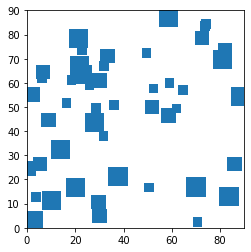

In [3]:
w = World()
plot_world(w)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

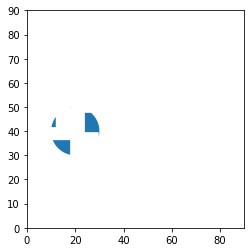

In [4]:
obs = w.make_observations(position=Point(20,40), radius=10)
plot_polygons(obs, dims=w.dims)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

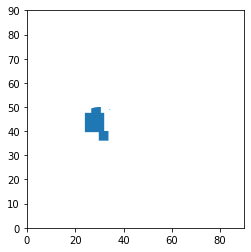

In [8]:
obs2 = w.make_observations(position=Point(30,40), radius=10)
plot_polygons(obs2, dims=w.dims)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

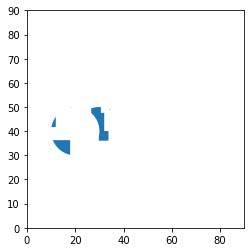

In [10]:
diff = obs ^ obs2
plot_polygons(diff, dims=w.dims)